# Машинное обучение (семинары)

## Урок 11. Качество модели и её улучшение

Тебе предстоит разработать модель машинного обучения для предсказания вероятности оттока клиентов в телекоммуникационной компании. У тебя есть набор данных, который содержит различные признаки о клиентах, такие как возраст, пол, тип подключения, длительность пользования услугами и т.д.

Твоя задача состоит в следующем:

1. Загрузить данные и провести предварительный анализ данных.

2. Подготовить данные для обучения модели. Это может включать удаление ненужных признаков, заполнение пропущенных значений и нормализацию данных.

3. Разделить данные на обучающую и тестовую выборки.

4. Выбрать модель машинного обучения, которую ты хочешь использовать для предсказания оттока клиентов. Например, можно использовать модель классификации, такую как логистическая регрессия или случайный лес.

5. Обучить модель на обучающей выборке и оценить ее производительность на тестовой выборке.

6. Провести анализ результатов и оценить важность различных признаков для предсказания оттока клиентов.

7. При необходимости, провести дополнительные эксперименты, чтобы улучшить производительность модели. Это может включать изменение параметров модели, добавление новых признаков или использование другой модели машинного обучения.

##### 1. Загрузить данные и провести предварительный анализ данных.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score

In [2]:
# Загрузка данных из файла
tell_df = pd.read_csv("telecom_churn.csv")

In [6]:
tell_df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [14]:
tell_df

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


Набор данных telecom_churn.csv информация о колонках:

State - Штат(Типо Американский регион)  (WV, MN, NY, AL, WI, OH, OR, WY, VA, CT, MI, ID, VT, TX, UT, IN, MD, KS, NC, NJ, MT, CO, NV, WA, RI, MA, MS, AZ, FL, MO, NM, ME, ND, NE, OK, DE, SC, SD, KY, IL, NH, AR, GA,
DC, HI, TN, AK, LA, PA, IA, CA)

Account length - Длина счета

Area code - Код региона

International plan - Международный тарифный план

Voice mail plan - Тарифный план голосовой почты

Number vmail messages - Количество сообщений vmail

Total day minutes - Общее количество минут за день

Total day calls - Общее количество звонков за день

Total day charge - Общая стоимость звонков за день

Total eve minutes - Общее количество минут за вечер 

Total eve calls - Общее количество звонков за вечер

Total eve charge - Общая стоимость звонков за вечер 

Total night minutes - Общее количество ночных минут

Total night calls - Общее количество ночных звонков

Total night charge - Общая стоимость звонков за ночь 

Total intl minutes - Общее количество международных минут

Total intl calls - Общее количество международных звонков

Total intl charge - Общая стоимость международных звонков

Customer service calls - Количество звонков в службу поддержки

Churn - Отток

In [7]:
# Просматриваем информацию о Dataframe
tell_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

Из общей информации telecom_churn следует:
1. DataFrame содержит 3333 записей (от индекса 0 до 3332)
2. Всего 20 колонок
3. Нулевые значения отсуствуют
4. Пропущенные значения отсуствуют
5. Колонки: Account length, Area code, Number vmail messages, Total day calls, Total eve calls, Total night calls, Total intl calls и Customer service calls в формате int64 
6. Колонки: Total day minutes, Total day charge, Total eve minutes, Total eve charge, Total night minutes, Total night charge, Total intl minutes и Total intl charge в формате float64
7. Колонки: State, International plan и Voice mail plan в формате object
8. Колонка Churn в формате bool

In [8]:
# Статистический анализ числовых переменных
tell_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Account length,3333.0,101.064806,39.822106,1.00,74.00,101.00,127.00,243.00
Area code,3333.0,437.182418,42.371290,408.00,408.00,415.00,510.00,510.00
Number vmail messages,3333.0,8.099010,13.688365,0.00,0.00,0.00,20.00,51.00
Total day minutes,3333.0,179.775098,54.467389,0.00,143.70,179.40,216.40,350.80
Total day calls,3333.0,100.435644,20.069084,0.00,87.00,101.00,114.00,165.00
Total day charge,3333.0,30.562307,9.259435,0.00,24.43,30.50,36.79,59.64
Total eve minutes,3333.0,200.980348,50.713844,0.00,166.60,201.40,235.30,363.70
Total eve calls,3333.0,100.114311,19.922625,0.00,87.00,100.00,114.00,170.00
Total eve charge,3333.0,17.083540,4.310668,0.00,14.16,17.12,20.00,30.91
Total night minutes,3333.0,200.872037,50.573847,23.20,167.00,201.20,235.30,395.00


На основе представленных статистических данных неприрывных признаков можно сделать следующие выводы:

Account length (Длина учетной записи):

- Средний параметр - 101.00
- Минимальный пареметр - 1.00
- Максимальный параметр - 243.00
- Медиана равна - 101.065
- Отклонение состовляет - 39.82

Area code (Код региона):

- Средний параметр - 415.00
- Минимальный пареметр - 408.00
- Максимальный параметр - 510.00
- Медиана равна - 437.18
- Отклонение состовляет - 42.37

Number vmail messages (Количество сообщений vmail):

- Средний параметр - 0.00
- Минимальный пареметр - 0.00
- Максимальный параметр - 51.00
- Медиана равна - 8.09
- Отклонение состовляет - 13.68

Total day minutes (Общее количество минут за день):

- Средний параметр - 179.40
- Минимальный пареметр - 0.00
- Максимальный параметр - 350.80
- Медиана равна - 179.77
- Отклонение состовляет - 54.46

Total day calls (Общее количество звонков за день):

- Средний параметр - 101.00
- Минимальный пареметр - 0.00
- Максимальный параметр - 165.00
- Медиана равна - 100.43
- Отклонение состовляет - 20.06

Total day charge (Общая стоимость звонков за день):

- Средний параметр - 30.50
- Минимальный пареметр - 0.00
- Максимальный параметр - 59.64
- Медиана равна - 30.56
- Отклонение состовляет - 9.25

Total eve minutes (Общее количество минут за вечер):

- Средний параметр - 201.40
- Минимальный пареметр - 0.00
- Максимальный параметр - 363.70
- Медиана равна - 200.98
- Отклонение состовляет - 50.71

Total eve calls (Общее количество звонков за вечер):

- Средний параметр - 100.00
- Минимальный пареметр - 0.00
- Максимальный параметр - 170.00
- Медиана равна - 100.11
- Отклонение состовляет - 19.92

Total eve charge (Общая стоимость звонков за вечер):

- Средний параметр - 17.12
- Минимальный пареметр - 0.00
- Максимальный параметр - 30.91 
- Медиана равна - 17.08
- Отклонение состовляет - 4.31

Total night minutes (Общее количество ночных минут):

- Средний параметр - 201.20
- Минимальный пареметр - 23.20
- Максимальный параметр - 395.00
- Медиана равна - 200.87
- Отклонение состовляет - 50.57

Total night calls (Общее количество ночных звонков):

- Средний параметр - 100.00
- Минимальный пареметр - 33.00
- Максимальный параметр - 175.00
- Медиана равна - 100.10
- Отклонение состовляет - 19.56 

Total night charge (Общая стоимость звонков за ночь ):

- Средний параметр - 9.05
- Минимальный пареметр - 1.04
- Максимальный параметр - 17.77
- Медиана равна - 9.03
- Отклонение состовляет - 2.27

Total intl minutes (Общее количество международных минут):

- Средний параметр - 10.30
- Минимальный пареметр - 0.00
- Максимальный параметр - 20.00
- Медиана равна - 10.23
- Отклонение состовляет - 2.79

Total intl calls (Общая стоимость международных звонков):

- Средний параметр - 4.00
- Минимальный пареметр - 0.00
- Максимальный параметр - 20.00
- Медиана равна - 4.47
- Отклонение состовляет - 2.46

Total intl charge (Общая сумма международных платежей):

- Средний параметр - 2.78
- Минимальный пареметр - 0.00
- Максимальный параметр - 5.40
- Медиана равна - 2.76
- Отклонение состовляет - 0.75

Customer service calls (Количество звонков в службу поддержки):

- Средний параметр - 1.00
- Минимальный пареметр - 0.00
- Максимальный параметр - 9.00
- Медиана равна - 1.56
- Отклонение состовляет - 1.31

In [9]:
# Статистический анализ объектных переменных
tell_df.describe(include='object').T

,count,unique,top,freq
State,3333,51,WV,106
International plan,3333,2,No,3010
Voice mail plan,3333,2,No,2411


State (Штат(Типо Американский регион)):

В количество котегориальных данных: 3333

Количество уникальных категиреональных записей: 51

Наиболее часто встречаемая категириональная запись: WV

Количество раз скоторой встречается наиболее частая категириональная запись: 106


International plan (Международный тарифный план):

В количество котегориальных данных: 3333

Количество уникальных категиреональных записей: 2

Наиболее часто встречаемая категириональная запись: No

Количество раз скоторой встречается наиболее частая категириональная запись: 3010


Voice mail plan (Тарифный план голосовой почты):

В количество котегориальных данных: 3333

Количество уникальных категиреональных записей: 2 

Наиболее часто встречаемая категириональная запись: No

Количество раз скоторой встречается наиболее частая категириональная запись: 2411

In [3]:
# Просмотрим значения переменной Churn
tell_df["Churn"].value_counts()

Churn
False    2850
True      483
Name: count, dtype: int64

C:\Users\Esdesu\AppData\Local\Temp\ipykernel_7936\2387900547.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=tell_df, palette='Set2')


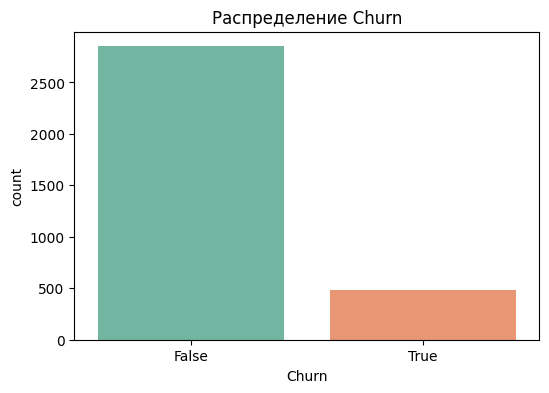

In [4]:
# Проверка баланса категириональных признаков
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=tell_df, palette='Set2')
plt.title("Распределение Churn")
plt.show()

2850 пользователей из 3333 являются лояльными их значение оттока равно 0, а 483 пользователя нелояльные, собираются уйти их значени равно 1.

Предварительно ответим на несколько вопросов, проанализируем DataFram прежде чем приступать к подготовке моделей.
Главная задача стоит: Разработать модель машинного обучения для предсказания вероятности оттока клиентов в телекоммуникационной компании.

1. Какова доля отошедших пользователей в нашем фрейме данных?

In [5]:
tell_df["Churn"].mean()

0.14491449144914492

Она состовляет 14,5%

2. Сколько времени в среднем ушедшие пользователи тратят на звонки в течение дня?

In [7]:
tell_df[tell_df["Churn"] == 1]["Total day minutes"].mean()

206.91407867494823

Ушедшие тратят в среднем 206.91 минут

3. Посмотрим сколько времени на звонки обе группы тратят в дневное, вечерние и ночное время суток.

In [8]:
columns_to_show = ["Total day minutes", "Total eve minutes", "Total night minutes"]

tell_df.groupby(["Churn"])[columns_to_show].describe(percentiles=[])

Total day minutes                                            \
                  count        mean        std  min    50%    max   
Churn                                                               
False            2850.0  175.175754  50.181655  0.0  177.2  315.6   
True              483.0  206.914079  68.997792  0.0  217.6  350.8   

      Total eve minutes                                             \
                  count        mean        std   min    50%    max   
Churn                                                                
False            2850.0  199.043298  50.292175   0.0  199.6  361.8   
True              483.0  212.410145  51.728910  70.9  211.3  363.7   

      Total night minutes                                              
                    count        mean        std   min     50%    max  
Churn                                                                  
False              2850.0  200.133193  51.105032  23.2  200.25  395.0  
True                483.0  205.231677  47.132825  47.4  204.80  354.9

4. Посмотрим как международние звонки влияют на оток клиентов.

<Axes: xlabel='International plan', ylabel='count'>

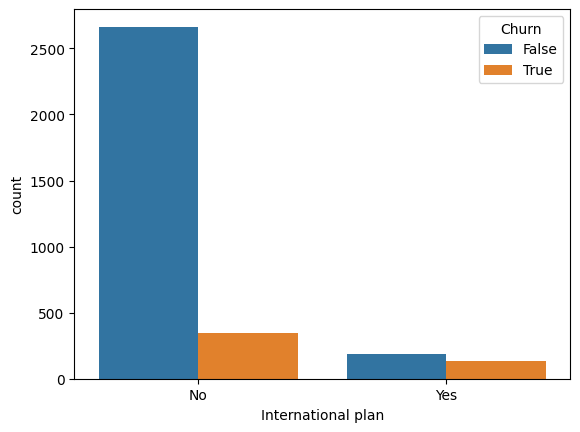

In [11]:
sns.countplot(x="International plan", hue="Churn", data=tell_df)

Возможно, большие и плохо контролируемые расходы на международные звонки приводят к оттоку клиентов оператора связи.

5. Рассмотрим звонки в службу поддерки.

<Axes: xlabel='Customer service calls', ylabel='count'>

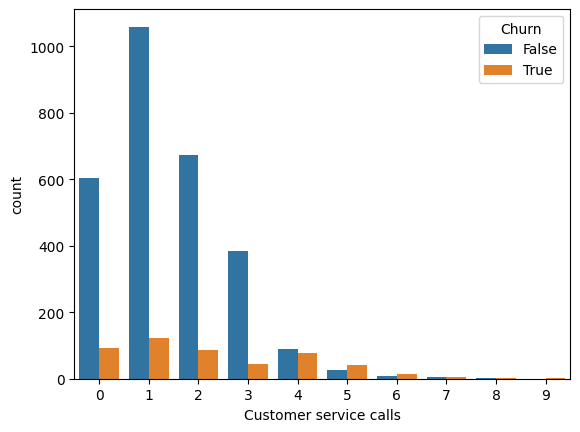

In [12]:
sns.countplot(x="Customer service calls", hue="Churn", data=tell_df)

Показатель оттока резко возрастает, начиная с 4 обращений в службу поддержки клиентов и выше.

##### 2. Подготовить данные для обучения модели. Это может включать удаление ненужных признаков, заполнение пропущенных значений и нормализацию данных.

In [10]:
# Убираем целевую переменную Churn из X
X = tell_df.drop(columns=['Churn'])

# Создание вектора целевой переменной y
y = tell_df['Churn']

In [11]:
# Получение всех дубликатов
duplicate_iris_df = tell_df[tell_df.duplicated(keep=False)]

# Вывод количества дубликатов
number_of_duplicates = duplicate_iris_df.shape
print("number of duplicate rows: ", number_of_duplicates)

# Вывести сами дубликаты
print(duplicate_iris_df)

number of duplicate rows:  (0, 20)
Empty DataFrame
Columns: [State, Account length, Area code, International plan, Voice mail plan, Number vmail messages, Total day minutes, Total day calls, Total day charge, Total eve minutes, Total eve calls, Total eve charge, Total night minutes, Total night calls, Total night charge, Total intl minutes, Total intl calls, Total intl charge, Customer service calls, Churn]
Index: []


Дубликатов не обнаружено.

In [12]:
# Проверка на NaN значения
tell_df.isnull().any().any()

False

In [13]:
# Проверка на нулевые значения
tell_df.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

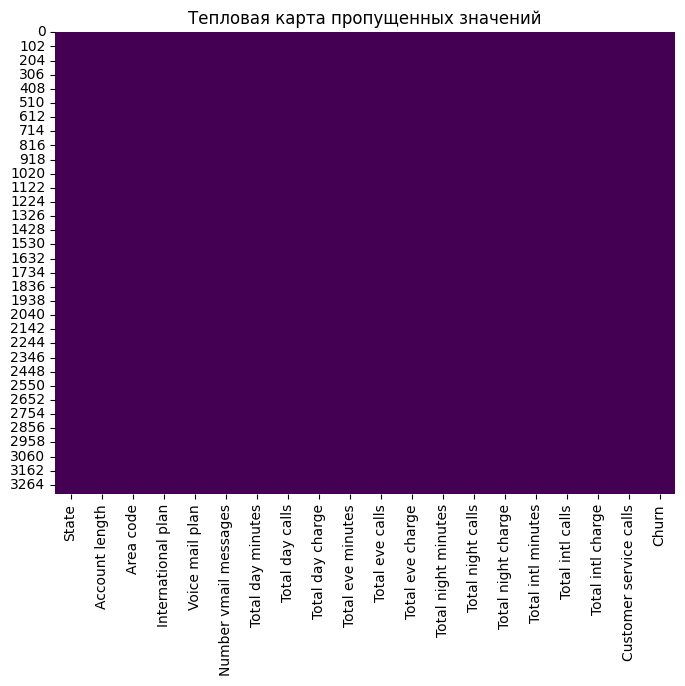

In [14]:
# Визуализация пропущенных значений (тепловая карта)
plt.figure(figsize=(8, 6))
sns.heatmap(tell_df.isnull(), cbar=False, cmap='viridis')
plt.title('Тепловая карта пропущенных значений')
plt.show()

Пропущеных значений и NaN не обнаружено. 

In [15]:
# Удаление конлонки строка состояния

# Кодирование столбцов International plan и Voice mail plan
tell_df['International plan'] = tell_df['International plan'].map({'Yes': 1, 'No': 0})
tell_df['Voice mail plan'] = tell_df['Voice mail plan'].map({'Yes': 1, 'No': 0})

# Преобразование целевой переменной Churn
tell_df['Churn'] = tell_df['Churn'].astype(int)

# Проверка изменений
print(tell_df[['International plan', 'Voice mail plan', 'Churn']].head())

   International plan  Voice mail plan  Churn
0                   0                1      0
1                   0                1      0
2                   0                0      0
3                   1                0      0
4                   1                0      0


In [16]:
# Просматриваем информацию о Dataframe
tell_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   int64  
 4   Voice mail plan         3333 non-null   int64  
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

KeyError: 'alcohol'

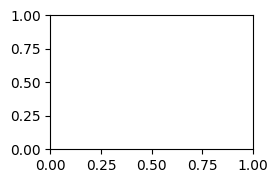

In [12]:
# Визуализация гистограмм 
plt.figure(figsize=(12, 8))
for i, column in enumerate(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline'], 1):
    plt.subplot(4, 4, i)
    sns.histplot(tell_df[column], kde=True)

plt.tight_layout()
plt.show()

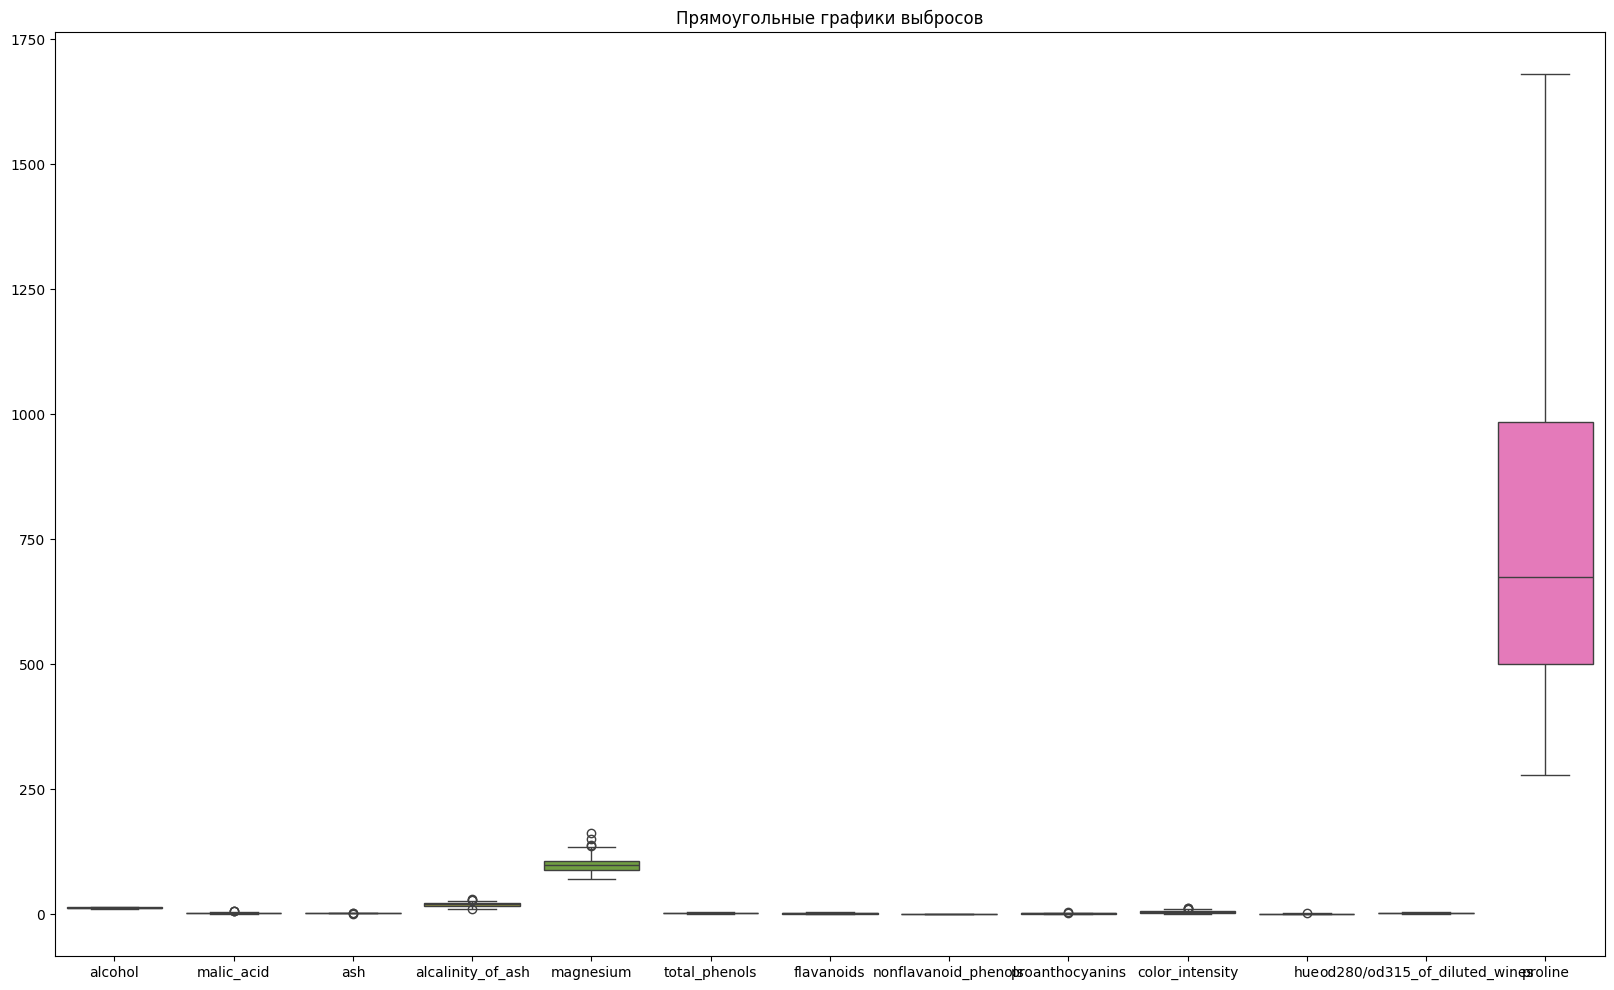

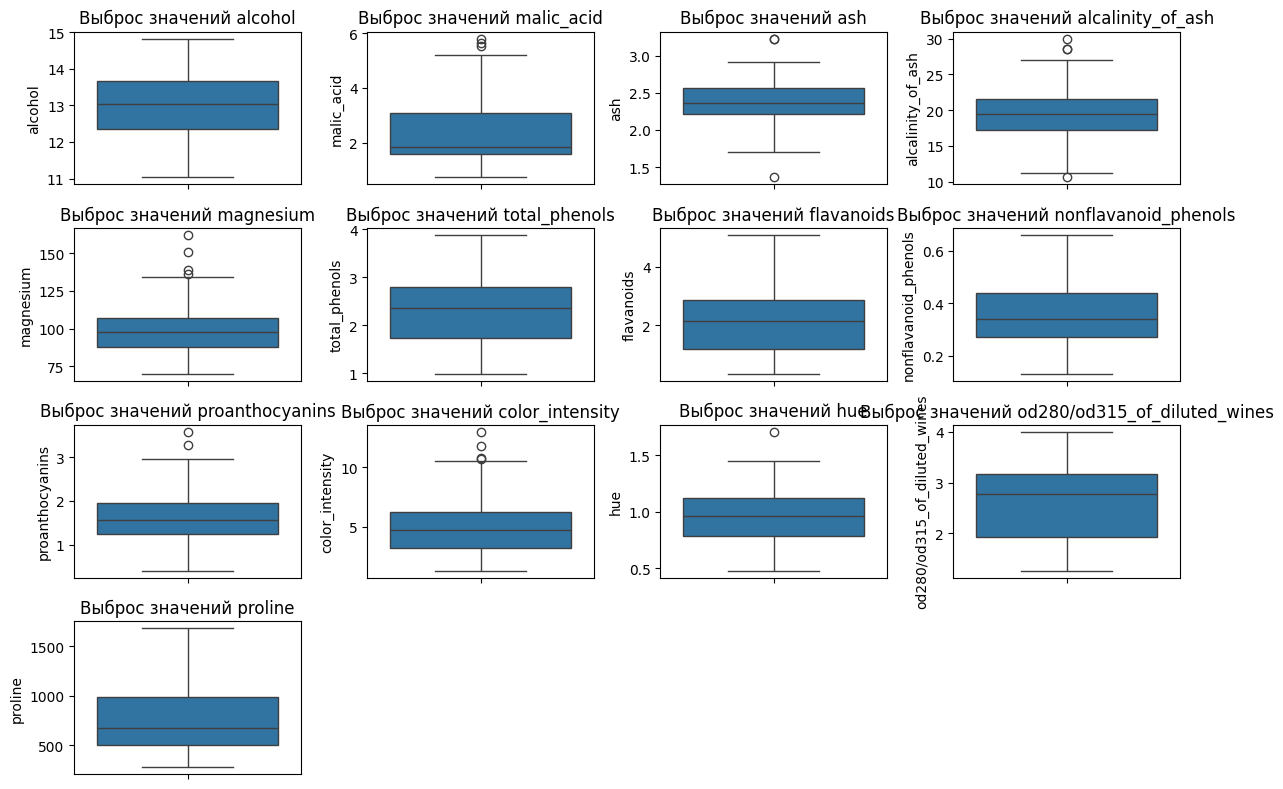

In [13]:
# Прямоугольные графики для визуализации распределений и потенциальных выбросов
# Визуализация распределения числовых переменных
# Установка стиля графиков
sns.set(style="whitegrid")

# Визуализация распределения нескольких выбранных числовых переменных
numerical_columns = tell_df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 6))
sns.boxplot(data=numerical_columns)
plt.title("Прямоугольные графики выбросов")
plt.xticks(rotation=45)  # Поворот меток по оси x для лучшей 

plt.tight_layout()
plt.show()

selected_columns =

plt.figure(figsize=(12, 8))
for i, column in enumerate(selected_columns):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(y=column, data=tell_df)
    plt.title(f"Выброс значений {column}")
    plt.ylabel(column)
plt.tight_layout()
plt.show()

In [18]:
# Создание экземпляра StandardScaler
scaler = StandardScaler()

# Обучение scaler на тренировочных данных и преобразование X_train
X_train_scaled = scaler.fit_transform(tell_df)

# Применение scaler к тестовым данным
X_test_scaled = scaler.transform(tell_df)

# Проверка размеров и первых нескольких значений отмасштабированных данных
print("Отмасштабированные данные X_train:")
print(X_train_scaled[:5])  # первые 5 строк
print("\nОтмасштабированные данные X_test:")
print(X_test_scaled[:5])  # первые 5 строк

ValueError: could not convert string to float: 'KS'

In [ ]:
# Приведение отмасштабированных данных к типу pd.DataFrame
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

# Проверка первых нескольких строк отмасштабированных DataFrame
print("Отмасштабированные данные X_train в формате DataFrame:")
print(X_train_scaled_df.head())  # первые 5 строк
print("\nОтмасштабированные данные X_test в формате DataFrame:")
print(X_test_scaled_df.head())  # первые 5 ст

Отмасштабированные данные X_train в формате DataFrame:
      Account length  Area code  International plan  Voice mail plan  \
2016       -0.511937   1.740454           -0.324289        -0.612192   
1362       -0.939002   1.740454           -0.324289        -0.612192   
2670        0.392435   1.740454           -0.324289         1.633475   
2210       -0.738030  -0.515843           -0.324289        -0.612192   
1846        0.492921   1.740454           -0.324289         1.633475   

      Number vmail messages  Total day minutes  Total day calls  \
2016              -0.585483           0.410716         0.873749   
1362              -0.585483          -0.864713         1.074874   
2670               0.289180           0.752053         0.370935   
2210              -0.585483           1.814605         0.471498   
1846               2.548723          -0.038896         0.823467   

      Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
2016          0.410877       

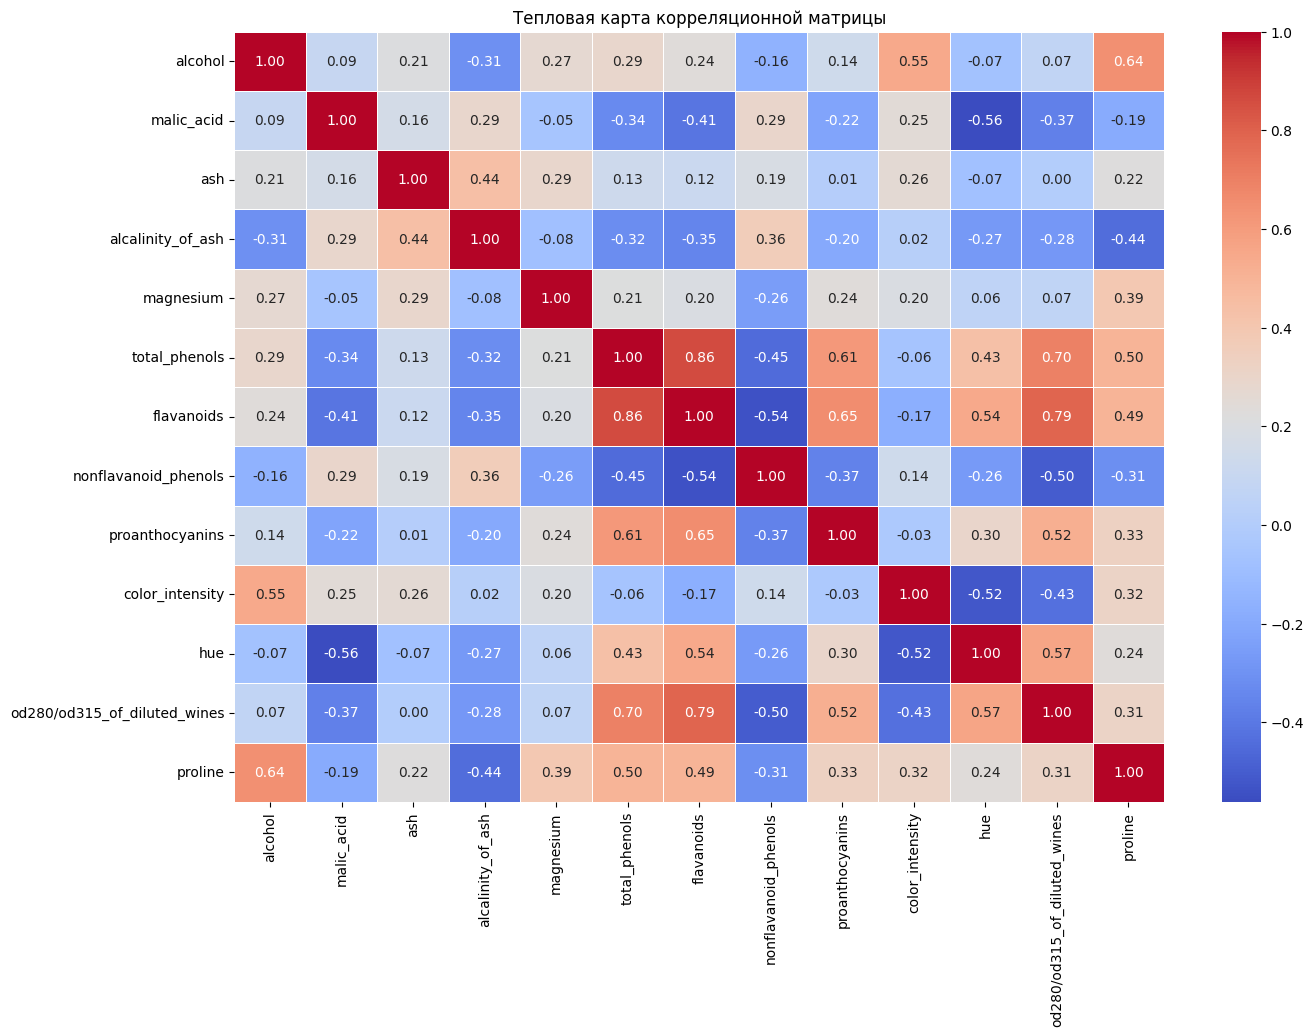

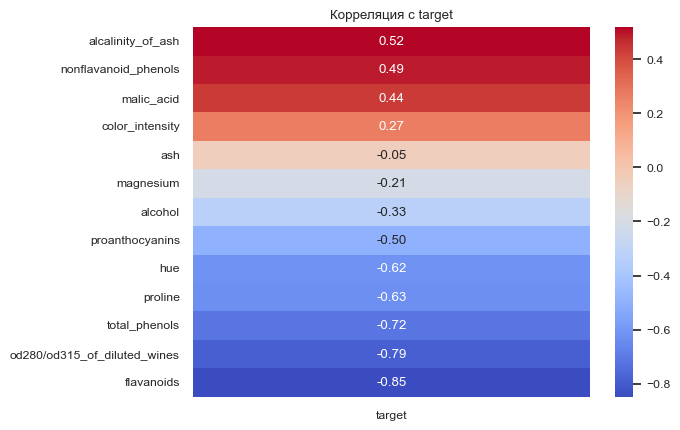

In [14]:
# Вычисляем корреляционную матрицу для обработанного DataFrame, Визуализация распределения нескольких выбранных числовых переменных
correlation_matrix_selected_columns = ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']

# Визуализация корреляции между выбранными переменными
correlation_matrix = tell_df[correlation_matrix_selected_columns].corr()
# Настраиваем размеры тепловой карты
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Тепловая карта корреляционной матрицы")
plt.show()

# Вычисляем корреляцию между всеми переменными и сохраняем в переменной corr
corr = tell_df.corr()
target_corr = corr['target'].drop('target')

# Сортируем корреляции по убыванию
target_corr_sorted = target_corr.sort_values(ascending=False)

# Настраиваем параметры визуализации для тепловой карты
sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Корреляция с target')
plt.show()

##### 3. Разделить данные на обучающую и тестовую выборки.

In [15]:
# Определение независимых и зависимых переменных
X = tell_df.drop(["target"], axis=1) # Независимые переменные
y = tell_df['target']  # Зависимая переменная

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Выводим размеры
print("Размер обучающего набора Wine:", X_train.shape)
print("Размер тестового набора: Wine", X_test.shape)

Размер обучающего набора Wine: (142, 13)
Размер тестового набора: Wine (36, 13)


##### 4. Выбрать модель машинного обучения, которую ты хочешь использовать для предсказания оттока клиентов. Например, можно использовать модель классификации, такую как логистическая регрессия или случайный лес.

In [16]:
# Масштабирование признаков
scaler = MinMaxScaler()
scaler.fit(X_train) # Обучаем scaler на тренировочных данных

# Преобразование X_train
X_train_scaled = scaler.transform(X_train)

# Применение scaler к тестовым данным
X_test_scaled = scaler.transform(X_test)

# Проверка размеров и первых нескольких значений отмасштабированных данных
print("Отмасштабированные данные X_train:")
print(X_train_scaled[:5])  # первые 5 строк
print("\nОтмасштабированные данные X_test:")
print(X_test_scaled[:5])  # первые 5 строк

Отмасштабированные данные X_train:
[[0.87105263 0.16089613 0.71657754 0.74226804 0.30434783 0.62758621
  0.20464135 0.75471698 0.72151899 1.         0.07317073 0.25274725
  0.30102443]
 [0.39473684 0.94093686 0.68449198 0.74226804 0.2826087  0.27931034
  0.05485232 0.94339623 0.21518987 0.28952043 0.27642276 0.15384615
  0.18676123]
 [0.35263158 0.03665988 0.39572193 0.40721649 0.19565217 0.87586207
  0.71940928 0.20754717 0.48417722 0.24511545 0.45528455 0.54945055
  0.30102443]
 [0.64473684 0.15885947 0.68449198 0.61340206 0.20652174 0.55862069
  0.16033755 0.73584906 0.59177215 0.88898757 0.07317073 0.18681319
  0.26950355]
 [0.53684211 0.12423625 0.39572193 0.25257732 0.30434783 0.48965517
  0.48523207 0.28301887 0.30063291 0.1740675  0.56910569 0.52014652
  0.58471237]]

Отмасштабированные данные X_test:
[[0.68684211 0.45010183 0.64171123 0.2371134  0.5        0.59310345
  0.56751055 0.0754717  0.39240506 0.29840142 0.3902439  0.76556777
  0.44680851]
 [0.83684211 0.64154786 0.577

In [17]:
# Приведение отмасштабированных данных к типу pd.DataFrame
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

# Проверка первых нескольких строк отмасштабированных DataFrame
print("Отмасштабированные данные X_train в формате DataFrame:")
print(X_train_scaled_df.head())  # первые 5 строк
print("\nОтмасштабированные данные X_test в формате DataFrame:")
print(X_test_scaled_df.head())  # первые 5 ст

Отмасштабированные данные X_train в формате DataFrame:
      alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
158  0.871053    0.160896  0.716578           0.742268   0.304348   
137  0.394737    0.940937  0.684492           0.742268   0.282609   
98   0.352632    0.036660  0.395722           0.407216   0.195652   
159  0.644737    0.158859  0.684492           0.613402   0.206522   
38   0.536842    0.124236  0.395722           0.252577   0.304348   

     total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
158       0.627586    0.204641              0.754717         0.721519   
137       0.279310    0.054852              0.943396         0.215190   
98        0.875862    0.719409              0.207547         0.484177   
159       0.558621    0.160338              0.735849         0.591772   
38        0.489655    0.485232              0.283019         0.300633   

     color_intensity       hue  od280/od315_of_diluted_wines   proline  
158         1.0000

##### 5. Обучить модель на обучающей выборке и оценить ее производительность на тестовой выборке.

In [18]:
# Создание модели случайного леса
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred = model.predict(X_test)

# Вычисление и вывод точности модели, генерация отчета о классификации, полноты и F1-меры
accuracy_train = accuracy_score(y_test, y_pred) 
precision_train = precision_score(y_test, y_pred, average='weighted')
recall_train = recall_score(y_test, y_pred, average='weighted')
f1_train = f1_score(y_test, y_pred, average='weighted')
report_train = classification_report(y_test, y_pred)

# Вывод результатов
print(f"Точность модели случайного леса: {accuracy_train:.2f}")
print(f"Полнота модели случайного леса: {recall_train:.2f}")
print(f"Оценка качества классификации случайного леса: {precision_train:.2f}")
print(f"F1-мера модели случайного леса: {f1_train:.2f}")
print("\nОтчет о классификации:\n", report_train)

Точность модели случайного леса: 1.00
Полнота модели случайного леса: 1.00
Оценка качества классификации случайного леса: 1.00
F1-мера модели случайного леса: 1.00

Отчет о классификации:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [19]:
# Получаем вероятности для каждого класса
y_pred_proba = model.predict_proba(X_test)

# Вычисление AUC для мультиклассовой задачи
auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')  # или multi_class='ovo'

print(f'AUC: {auc}')


AUC: 1.0


Полученная метрика говорит о том, что модель идеально разделяет классы.

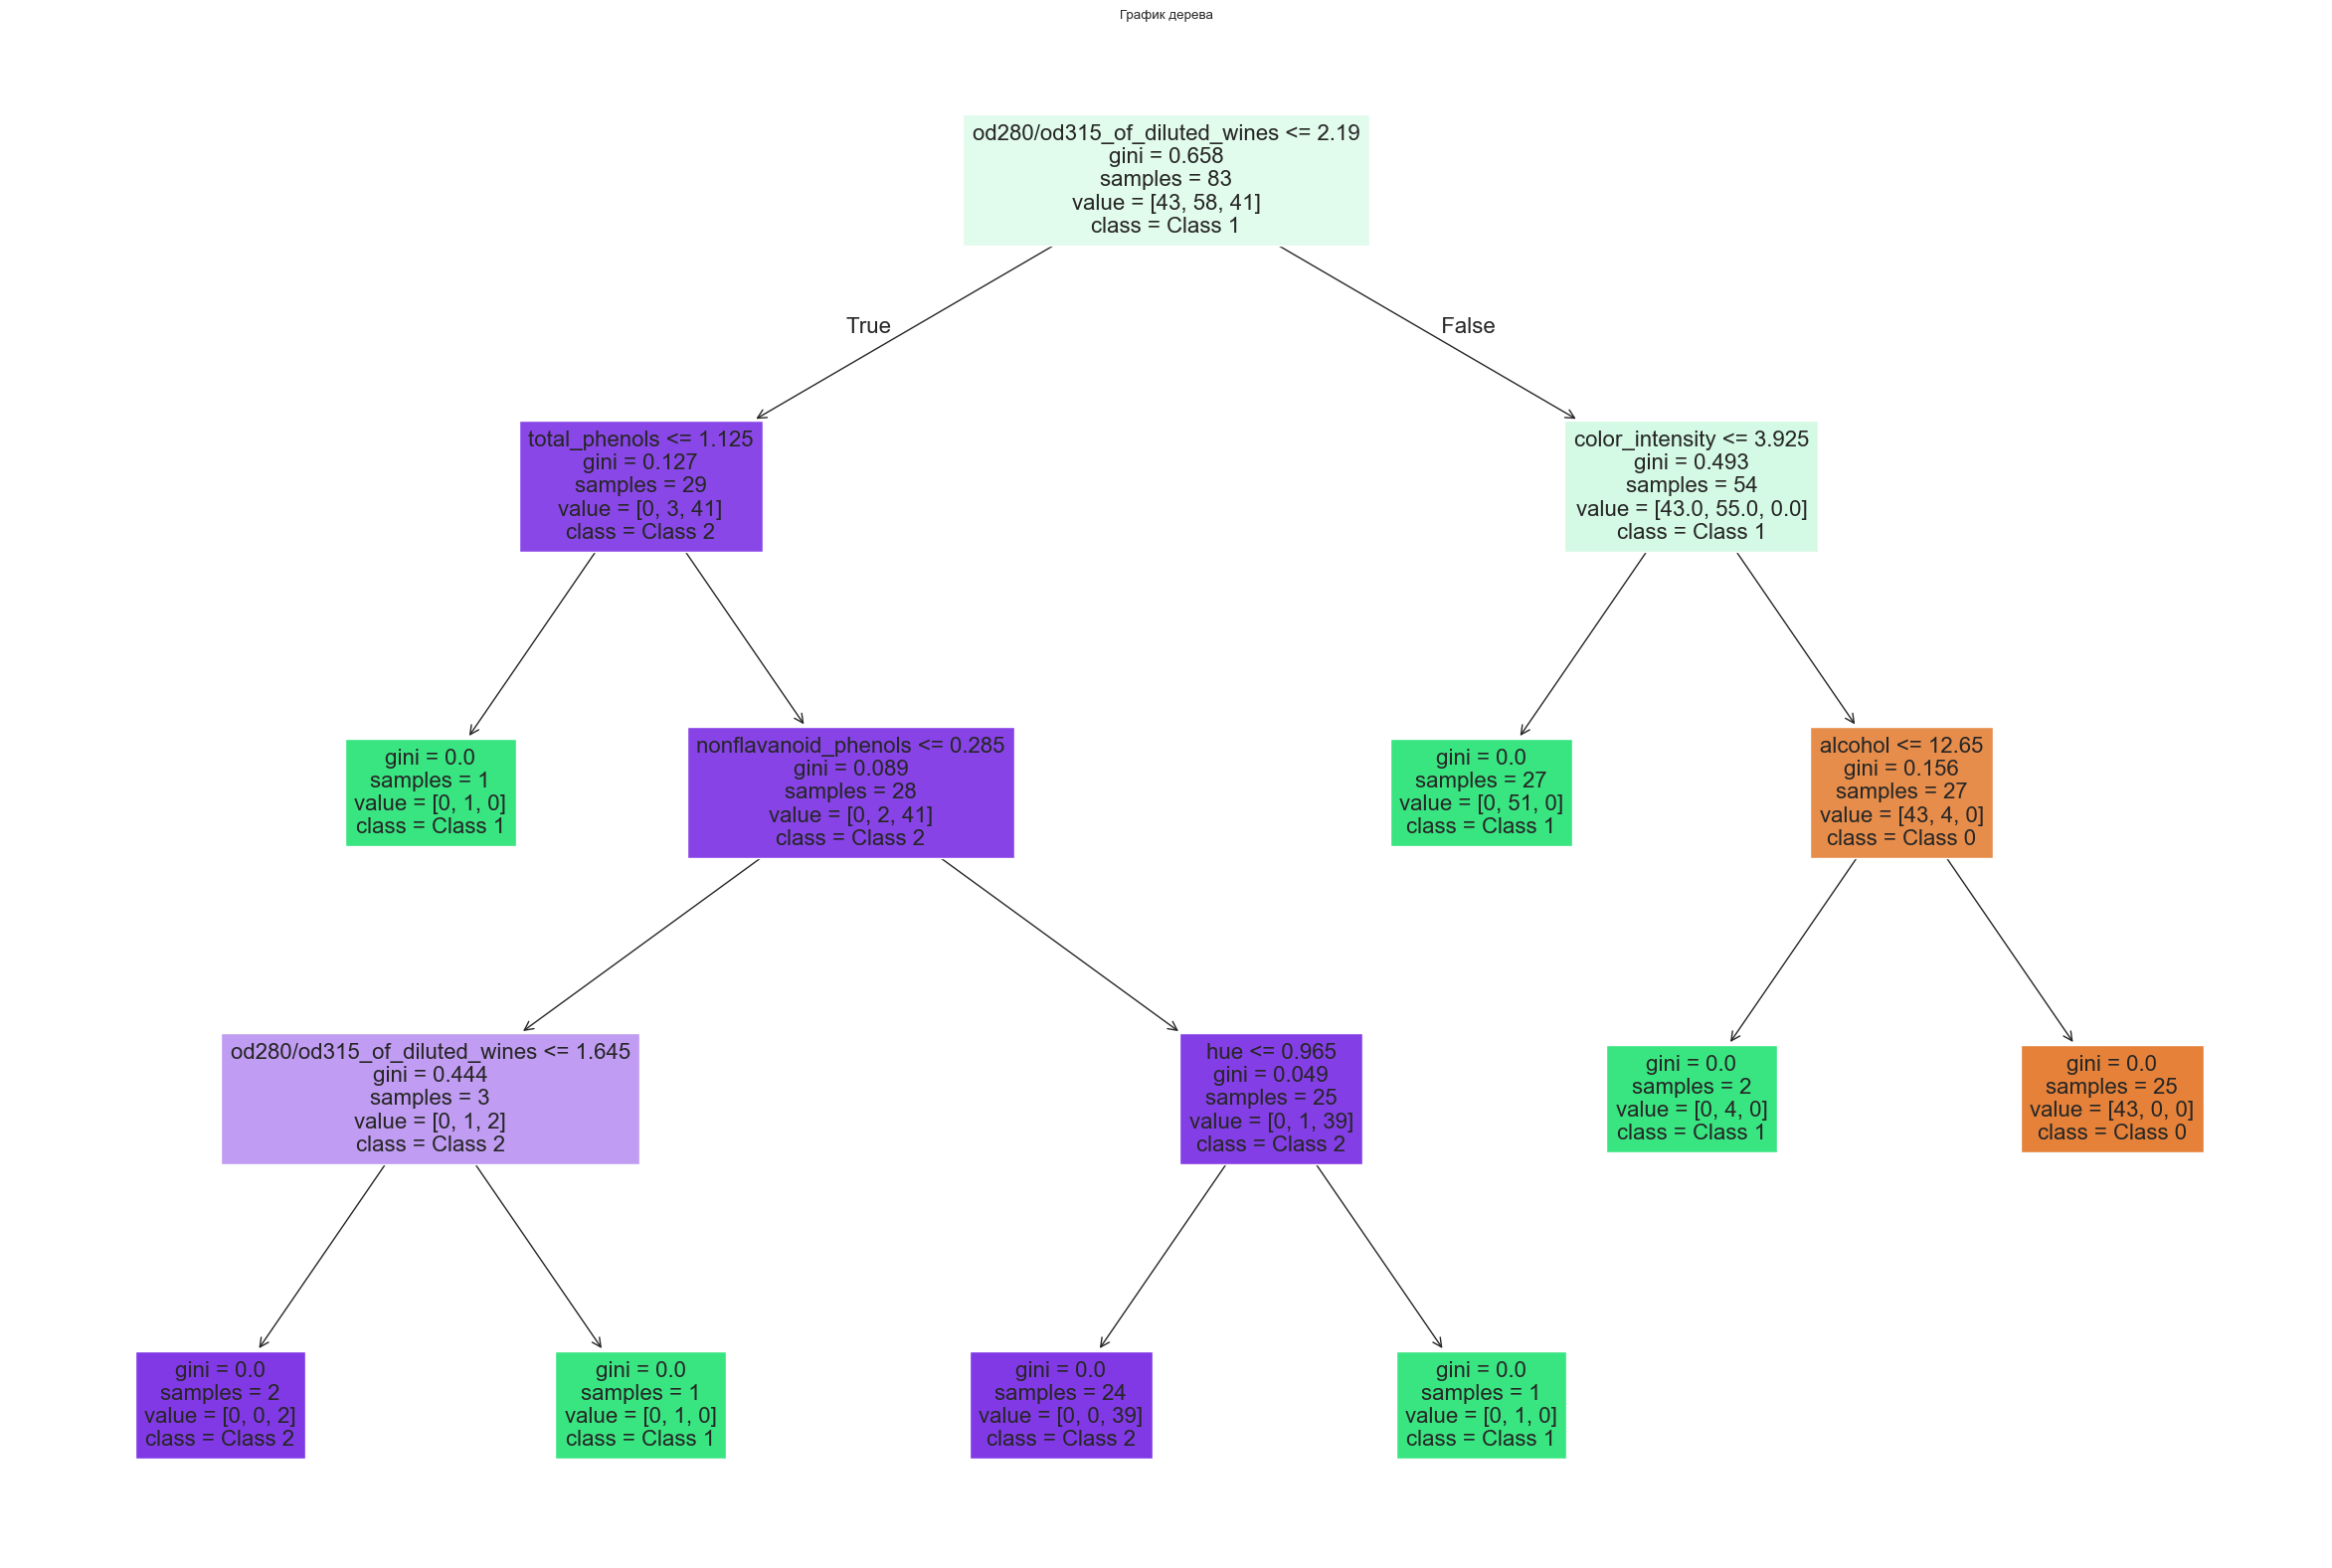

In [20]:
# Построение графика дерева
plt.figure(figsize=(30, 20))  

plot_tree(model.estimators_[0], filled=True, 
    feature_names=['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline'],  # Имена признаков
    class_names=['Class 0', 'Class 1', 'Class 2'])  # Имена классов
plt.title('График дерева')  
plt.show() 

##### 6. Провести анализ результатов и оценить важность различных признаков для предсказания оттока клиентов.

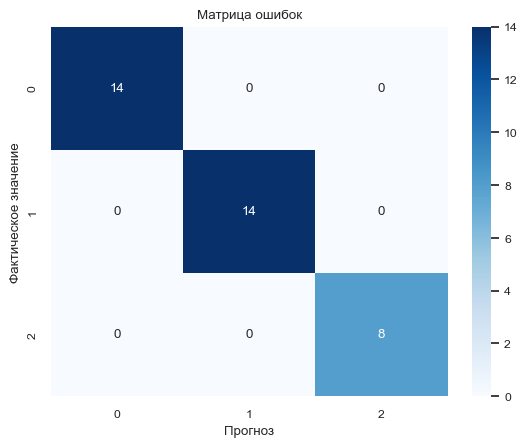

In [21]:
confusion_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap = "Blues")
plt.xlabel("Прогноз")
plt.ylabel("Фактическое значение")
plt.title("Матрица ошибок")
plt.show()

In [22]:
# Оценка производительности модели
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print(f'Кросс-валидация (точность):\n {cv_scores}')
print(f'Средняя точность: {cv_scores.mean()}')

Кросс-валидация (точность):
 [1.         1.         0.92857143 0.96428571 1.        ]
Средняя точность: 0.9785714285714286


На одном из флодов модель показала не идеальную точность, но выше 0.90 уже достаточно высокая точность. Среднее значение точности по всем фолдам, что составляет 0.97 очень хороший результат и указывает на то, что модель хорошо обучена и может обобщать данные.

##### 7. При необходимости, провести дополнительные эксперименты, чтобы улучшить производительность модели. Это может включать изменение параметров модели, добавление новых признаков или использование другой модели машинного обучения.

In [23]:
# Определение параметров для подбора
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Создание объекта GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Вывод лучших параметров
print(f"Лучшие гиперпараметры для модели (Grid Search): {grid_search.best_params_}")
print(f"Лучшая оценка для модели (Grid Search): {grid_search.best_score_:.2f}")

Лучшие гиперпараметры для модели (Grid Search): {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Лучшая оценка для модели (Grid Search): 0.98


В результате поиска лучших гиперпараметров для модели, и получили следующие результаты:
max_depth - None, деревья будут глубокими, пока не будут достигнуты другие ограничения

min_samples_split - 2, для разделения узла необходимо не менее 2 образцов

n_estimators - 100, будет использовано 100 деревьев в ансамбле

Модель достигла точности 0.98 на тестовом наборе данных, что ниже при базовой модели в 1.0, что возможно говорит о том что базовая модель переобучилась.

In [24]:
# Обучение модели с оптимальными гиперпараметрами
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Оценка производительности на тестовой выборке
test_accuracy = best_model.score(X_test, y_test)

# Получение предсказаний модели
y_pred_best = best_model.predict(X_test)

# Вычисление и вывод точности модели, генерация отчета о классификации, полноты и F1-меры
accuracy_train = accuracy_score(y_test, y_pred_best) 
precision_train = precision_score(y_test, y_pred_best, average='weighted')
recall_train = recall_score(y_test, y_pred_best, average='weighted')
f1_train = f1_score(y_test, y_pred_best, average='weighted')
report_train = classification_report(y_test, y_pred_best)

# Вывод результатов
print(f'Точность на тестовой выборке: {test_accuracy}')
print(f"Точность улучшеной модели: {accuracy_train:.2f}")
print(f"Полнота улучшеной модели: {recall_train:.2f}")
print(f"Оценка качества классификации улучшеной модели: {precision_train:.2f}")
print(f"F1-мера модели улучшеной модели: {f1_train:.2f}")
print("\nОтчет о классификации улучшеной модели:\n", report_train)



Точность на тестовой выборке: 1.0
Точность улучшеной модели: 1.00
Полнота улучшеной модели: 1.00
Оценка качества классификации улучшеной модели: 1.00
F1-мера модели улучшеной модели: 1.00

Отчет о классификации улучшеной модели:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [29]:
# Получаем вероятности для каждого класса
y_pred_proba_best = best_model.predict_proba(X_test)

# Вычисление AUC для мультиклассовой задачи
auc = roc_auc_score(y_test, y_pred_proba_best, multi_class='ovr')  # или multi_class='ovo'

print(f'AUC: {auc}')

AUC: 1.0


In [30]:
# 10-кратная кросс-валидация на всем датасете
scores_10 = cross_val_score(best_model, X, y, cv=10, scoring='accuracy')
print("Среднее значение ROC AUC при 10-кратной кросс-валидации:", scores_10.mean())

# Использование cross_val_predict для получения вероятностей
y_pred_proba = cross_val_predict(best_model, X, y, cv=5, method='predict_proba')

# Убедитесь, что y_pred_proba имеет правильную форму
cross_val_auc = roc_auc_score(y, y_pred_proba, multi_class='ovr')  # Убедитесь, что 'ovr' или 'ovo' выбран корректно
print("ROC AUC с использованием cross_val_predict:", cross_val_auc)

Среднее значение ROC AUC при 10-кратной кросс-валидации: 0.9833333333333332
ROC AUC с использованием cross_val_predict: 0.9986649478535196


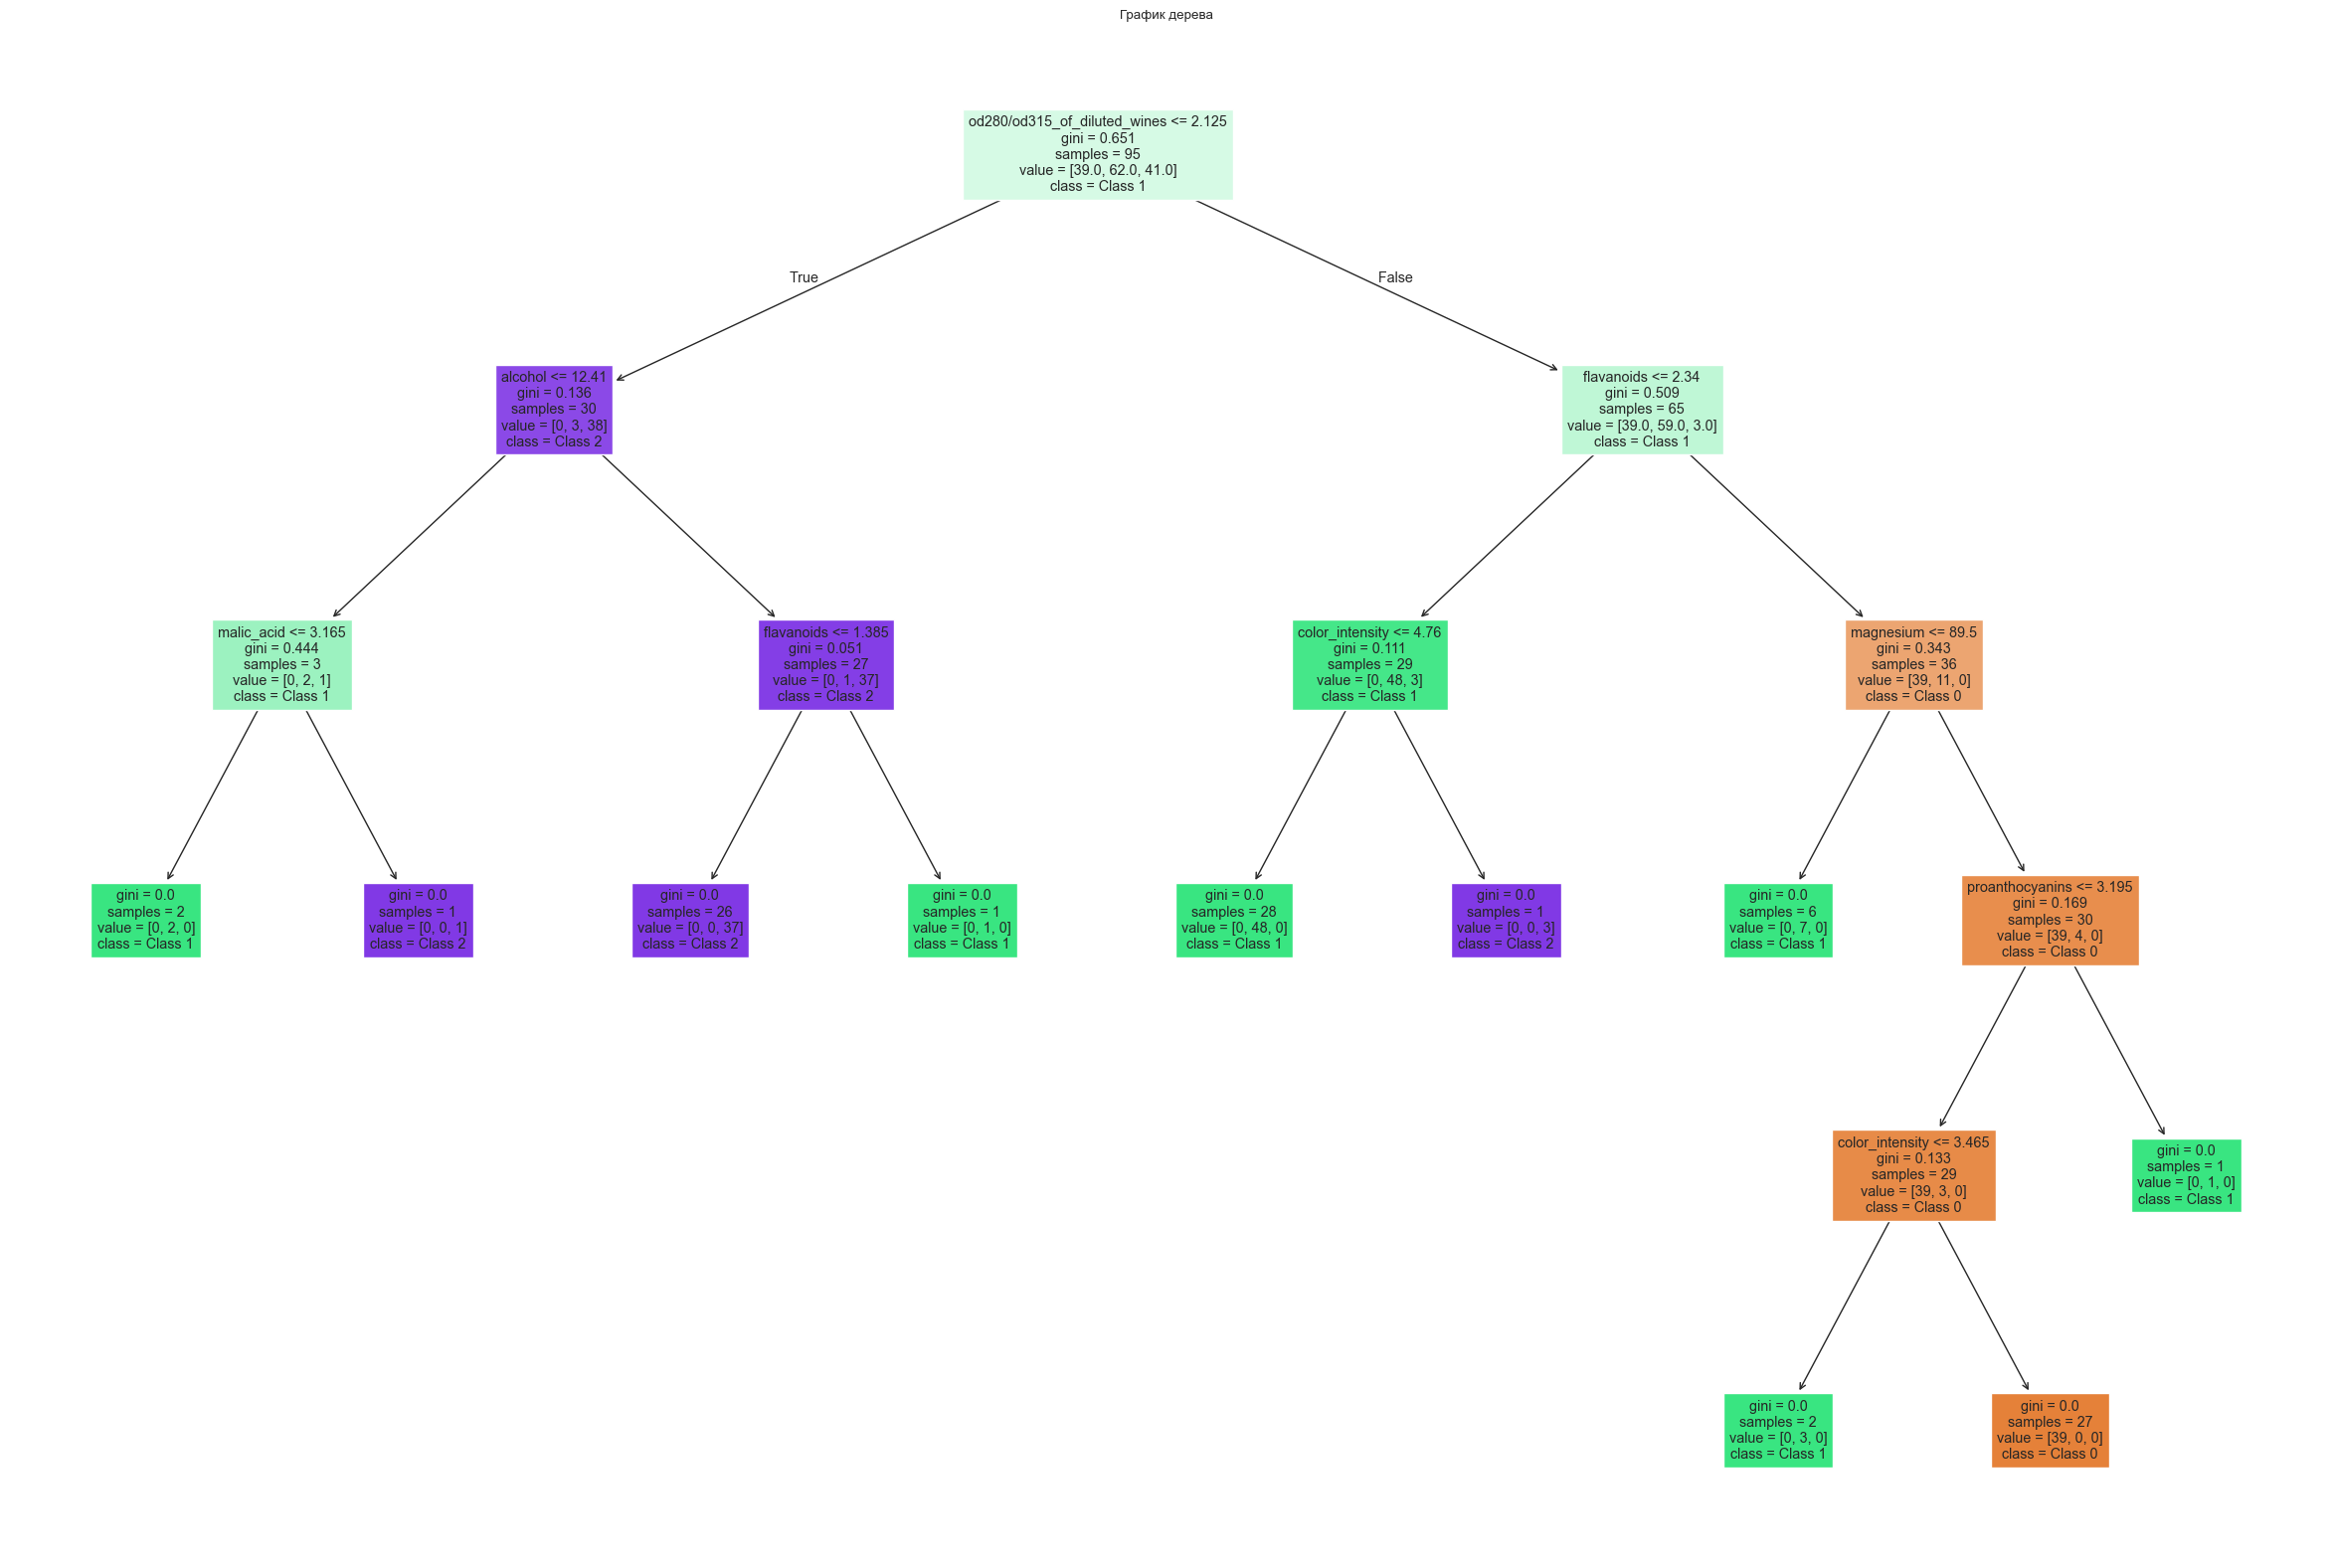

In [27]:
# Построение графика дерева
plt.figure(figsize=(30, 20))  

plot_tree(best_model.estimators_[0], filled=True, 
    feature_names=['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline'],  # Имена признаков
    class_names=['Class 0', 'Class 1', 'Class 2'])  # Имена классов
plt.title('График дерева')  
plt.show() 

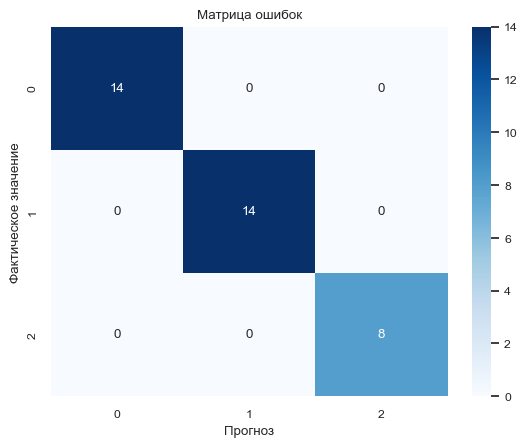

In [28]:
confusion_mat = confusion_matrix(y_test, y_pred_best)
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap = "Blues")
plt.xlabel("Прогноз")
plt.ylabel("Фактическое значение")
plt.title("Матрица ошибок")
plt.show()

Для работы с датасетом была выбрана модель RandomForestClassifier в базовом варианте она показывает отличные результаты 1.0, попробовал улучшить при помощи подбора гиперпараметров GridSearchCV и получить метрику немного хужже 0.98, что есть с одной стороны хорошо как исключает момент с переобученим модели в базе. С помощью кросс-валидации убедились в том, что модель не склонна к переобучению. При повторном обучении с лучшими параметрами модель опять показала отличный результат 1.0